## Analyzing Star Wars Data

The team at FiveThirtyEight surveyed a question with star wars fans **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?** using the online tool SurveyMonkey. They received 835 total responses. So we will be analyzing these data based on the responses from the star wars fans and will answer the above question.

The data has several columns, including:
* RespondentID - An anonymized ID for the respondent (person taking the survey)
* Gender - The respondent's gender
* Age - The respondent's age
* Household Income - The respondent's income
* Education - The respondent's education level
* Location (Census Region) - The respondent's location
* Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
* Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response

## Summary
After analyzing the data,The episode 5 “The Empire Strikes Back” is the most seen and best ranked episode by most of the respondents. In general, the earlier movies seem to be more popular.

## Exploring Data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns = 99

In [2]:
data = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
data.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   float64
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1187 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          837 non-null    object 
 3   Which of the following Star 

In [4]:
# Removing just one row is null of the RespondentID column
data=data[data['RespondentID'].notnull()]

### Cleaning and Mapping Yes/No Columns
The following columns represent Yes/No questions. They can also be NaN where a respondent chooses not to answer a question:

Have you seen any of the 6 films in the Star Wars franchise?
Do you consider yourself to be a fan of the Star Wars film franchise?
We will convert each column to a Boolean having only the values True, False, and NaN in order to make the data a bit easier to analyze.

In [5]:
yes_no = {"Yes": True, "No": False}
# We use Series.map() to converting
data['Have you seen any of the 6 films in the Star Wars franchise?']=data['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
data['Do you consider yourself to be a fan of the Star Wars film franchise?']=data['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

print(data['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts())
print(data['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts())

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


### Cleaning and Mapping Checkbox Columns
The columns 3 to 9 represent a single checkbox question. The respondent checked off a series of boxes in response to the question, Which of the following Star Wars films have you seen? Please select all that apply.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

In [6]:
checkbox = data.columns[3:9]
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan: False
}
for col in checkbox:
    data[col]=data[col].map(movie_mapping)

In [7]:
# Renaming the column to seen_1,seen_2... and so on
data = data.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

### Cleaning the Ranking Columns
The next six columns (from 9 to 15) ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. We'll need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily.

In [8]:
# Converting data type from integer to float
data[data.columns[9:15]] = data[data.columns[9:15]].astype(float)
# Renaming columns
data = data.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

## Analyzing Ranking

In [9]:
# Calculating the mean ranking of six films
mean = data.iloc[:,9:15].mean()
mean

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

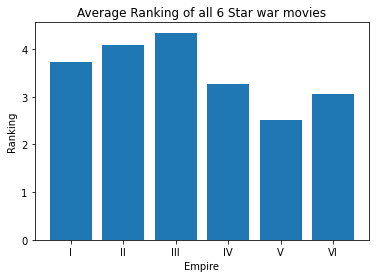

In [10]:
# Visualizing the mean rankings
x=['I','II','III','IV','V','VI']
plt.bar(x,mean)
plt.title('Average Ranking of all 6 Star war movies')
plt.ylabel('Ranking')
plt.xlabel('Empire')
plt.show()

The bar chart indicates the first three movies of the series are rated much more highly than the newer ones and the fifth movie, **“The Empire Strikes Back”**, the lowest rated means that is the best movie of the series.

## Analyzing view counts

In [11]:
view = data.iloc[:,3:9]
view

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True
...,...,...,...,...,...,...
1182,True,True,True,True,True,True
1183,True,True,True,True,True,True
1184,False,False,False,False,False,False
1185,True,True,True,True,True,True


Text(0.5, 0, 'Seen columns by movie')

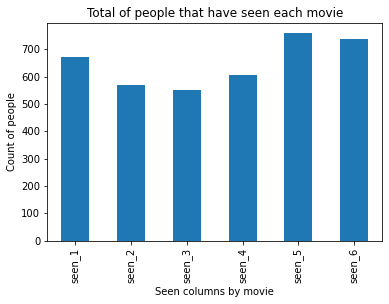

In [12]:
view.sum().plot.bar()
plt.title('Total of people that have seen each movie')
plt.ylabel('Count of people')
plt.xlabel('Seen columns by movie')

## Conclusion
Previous plot, we observed that **The Empire Strikes Back** is the most favorit movie, and now, it is the most watched too

## Analyzing base on Education

In [13]:
print(data.iloc[:,-2].value_counts())
print('*'*12)
# Remove 7 rows cause it too small to analyze
data_edu = data[data.iloc[:,-2] != "Less than high school degree"]
print(data_edu.iloc[:,-2].value_counts())

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64
************
Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Name: Education, dtype: int64


In [16]:
data_edu_view = data_edu.groupby('Education').sum().iloc[:,2:8]
data_edu_ranking = data_edu.groupby('Education').mean().iloc[:,8:15]

data_edu_view

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
Education,,,,,,
Bachelor degree,206,170,163,195,243,234
Graduate degree,179,149,139,163,207,201
High school degree,57,48,48,53,61,60
Some college or Associate degree,211,186,183,180,227,223


In [49]:
data_edu_ranking

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
Education,,,,,,
Bachelor degree,3.828244,4.290076,4.521073,3.114504,2.309160,2.931298
Graduate degree,3.822222,4.225664,4.500000,3.199115,2.323009,2.920354
High school degree,3.802817,3.746479,4.126761,3.211268,2.873239,3.239437
Some college or Associate degree,3.551181,3.885827,4.102362,3.503937,2.783465,3.173228


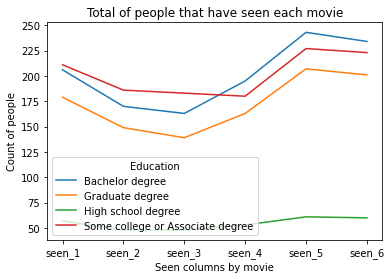

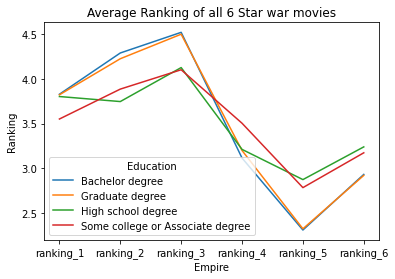

In [59]:
data_edu_view.T.plot()
plt.title('Total of people that have seen each movie')
plt.ylabel('Count of people')
plt.xlabel('Seen columns by movie')

data_edu_ranking.T.plot()
plt.title('Average Ranking of all 6 Star war movies')
plt.ylabel('Ranking')
plt.xlabel('Empire')
plt.show()

## Conclusion
According to two plots above, We can see the group of **Some college or Associate degree**, they watched the first part the most and they ranked it so quite good too. Therefore they tended to rank the new movies lower than others.

One more thing, The plots illustrate that the most of our customers who had Colege degree or higher so the director of content should produce the next movie how to fit with them.
